<a href="https://colab.research.google.com/github/mihutandra/Python---Math-Games/blob/main/3MathGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scatter Plot Game

In [ ]:
import matplotlib.pyplot as plt
import random

def scatter_plot_game():
        score = 0

        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10

        fig, ax = plt.subplots()

        for i in range(0,3):
            xpoint = random.randint(xmin, xmax)
            ypoint = random.randint(ymin, ymax)
            x = [xpoint]
            y = [ypoint]
            plt.axis([xmin,xmax,ymin,ymax]) # window size
            plt.plot([xmin,xmax],[0,0],'b') # blue x axis
            plt.plot([0,0],[ymin,ymax], 'b') # blue y axis
            plt.plot(x, y, 'go')
            print(" ")
            plt.grid() # displays grid lines on graph
            plt.show()
            guess = input("Enter the coordinates of the green point point: \n")
            guess_array = guess.split(",")
            xguess = int(guess_array[0])
            yguess = int(guess_array[1])
            if xguess == xpoint and yguess == ypoint:
                score = score + 1
                print("Corrrect!")
            else:
                print("Wrong...")

        print("Your score: ", score) # notice this is not in the loop

scatter_plot_game()

#Algebra Practice Game

In [ ]:
import random

def generate_one_step_problem():
    x = random.randint(-50, 50)
    a = random.randint(-10, 10)
    b = random.randint(-10, 10)

    expression = f"{a}x + {b} = {a*x + b}"
    answer = x

    return expression, answer

def generate_two_step_problem():
    x = random.randint(-50, 50)
    a = random.randint(-10, 10)
    b = random.randint(-10, 10)
    c = random.randint(-10, 10)

    expression = f"{a}x + {b} - {c} = {a*x + b - c}"
    answer = x

    return expression, answer

def algebra_practice_game():
    num_problems = int(input("How many (math) problems do you want?: "))
    correct_count = 0

    print("Welcome to the Algebra Practice Game!")
    print("Solve the following equations for 'x':")

    for i in range(num_problems):
        problem_type = random.choice(['one_step', 'two_step'])

        if problem_type == 'one_step':
            expression, answer = generate_one_step_problem()
        else:
            expression, answer = generate_two_step_problem()

        user_answer = int(input(f"\nProblem {i+1}: {expression}\nYour answer: "))

        if user_answer == answer:
            print("Correct!")
            correct_count += 1
        else:
            print(f"Sorry, the correct answer was {answer}.")

    print(f"\nYou got {correct_count} out of {num_problems} problems correct.")

algebra_practice_game()


How many (math) problems do you want?: 1
Welcome to the Algebra Practice Game!
Solve the following equations for 'x':

Problem 1: -7x + -9 - 8 = -367
Your answer: 3
Sorry, the correct answer was 50.

You got 0 out of 1 problems correct.


#Projectile Game

Select game level (1 or 2): 1


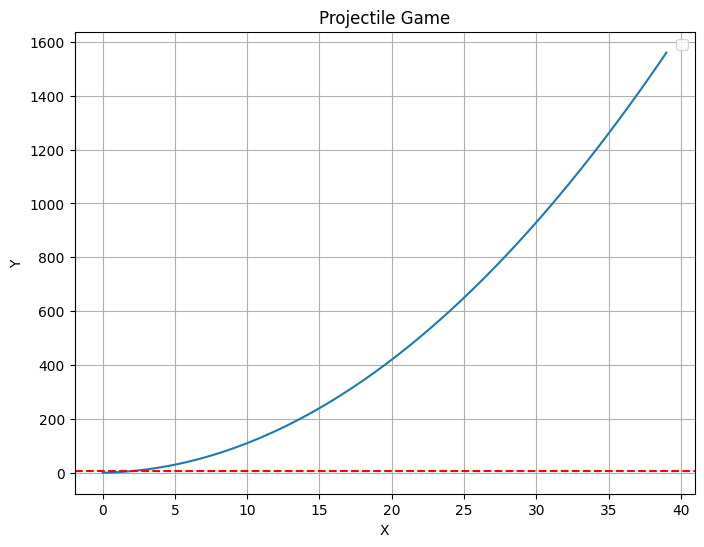

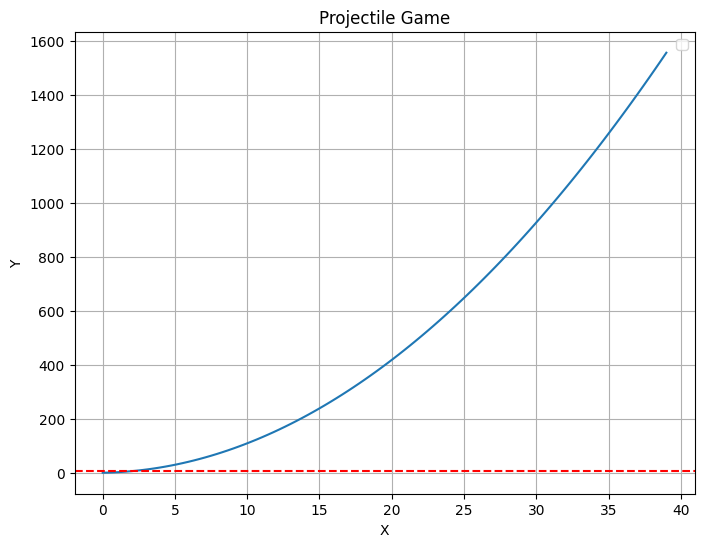

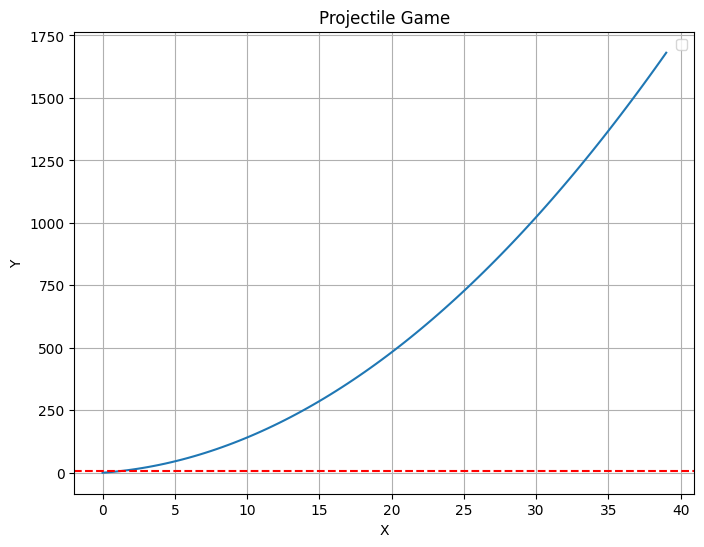

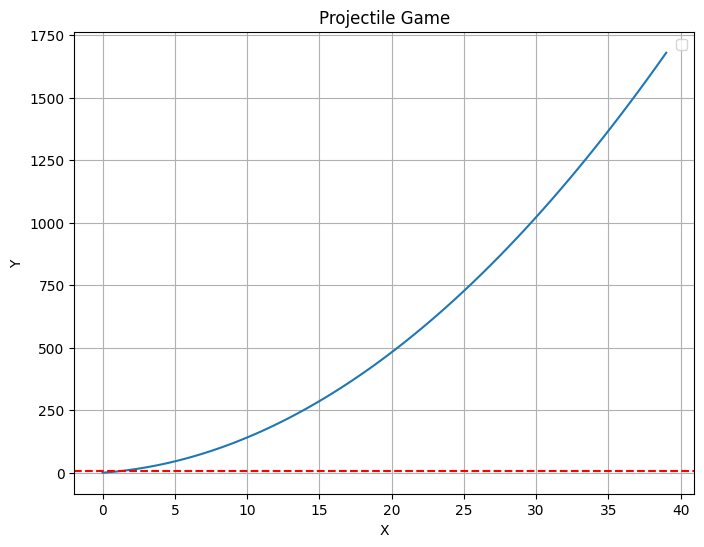

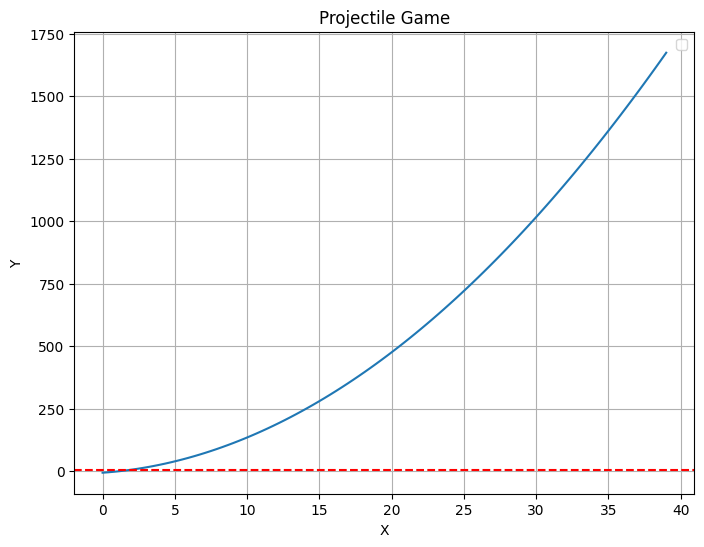

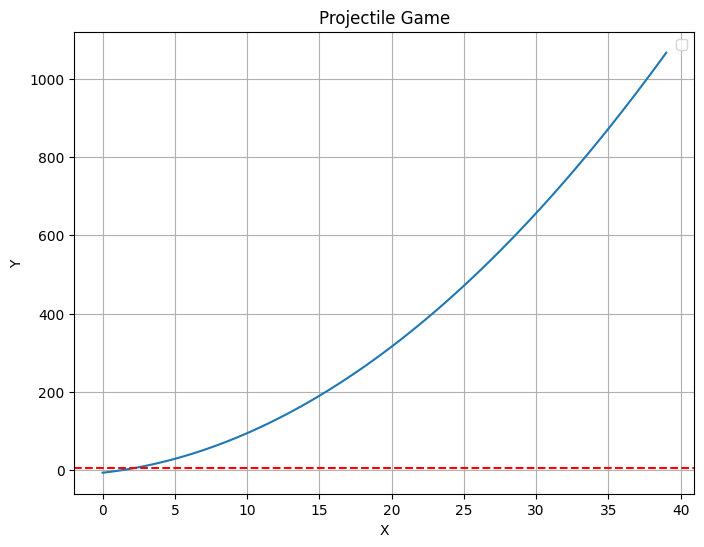

<ipython-input-15-03a144a8dc38>:25: RuntimeWarning: invalid value encountered in sqrt
  intersection_x = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)


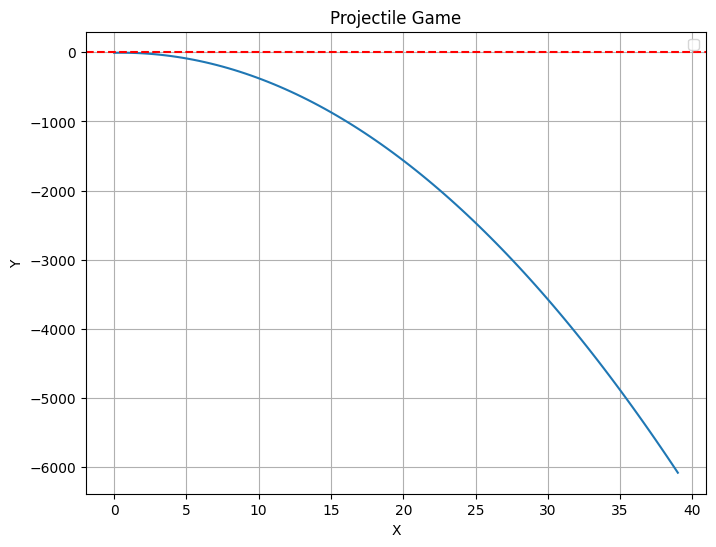

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

def generate_wall():
    wall_height = random.randint(5, 20)
    wall_distance = random.randint(25, 40)
    return wall_height, wall_distance

def plot_path(a, b, c, wall_height, wall_distance):
    plt.figure(figsize=(8, 6))

    x_vals = np.linspace(0, wall_distance + 5, 100)
    y_vals = a * x_vals**2 + b * x_vals + c

    plt.plot(x_vals, y_vals)
    plt.axhline(y=wall_height, color='r', linestyle='--')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Projectile Game')
    plt.grid(True)

    intersection_x = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    intersection_y = a * intersection_x**2 + b * intersection_x + c
    if 0 < intersection_x < wall_distance and intersection_y > wall_height:
        plt.plot(intersection_x, intersection_y, 'ro', label='Intersection')

    plt.legend()
    plt.show()

def slider_update(change):
    a = slider_a.value
    b = slider_b.value
    c = slider_c.value
    plot_path(a, b, c, wall_height, wall_distance)

def manual_input(change):
    global wall_height, wall_distance
    a = float(input_a.value)
    b = float(input_b.value)
    c = float(input_c.value)

    plot_path(a, b, c, wall_height, wall_distance)

def game_level_one():
    global wall_height, wall_distance, slider_a, slider_b, slider_c
    wall_height, wall_distance = generate_wall()

    slider_a = widgets.FloatSlider(min=-10, max=10, step=0.1, value=1, description='a')
    slider_b = widgets.FloatSlider(min=-10, max=10, step=0.1, value=1, description='b')
    slider_c = widgets.FloatSlider(min=-10, max=10, step=0.1, value=0, description='c')

    sliders = widgets.VBox([slider_a, slider_b, slider_c])
    display(sliders)

    slider_a.observe(slider_update, names='value')
    slider_b.observe(slider_update, names='value')
    slider_c.observe(slider_update, names='value')

    plot_path(1, 1, 0, wall_height, wall_distance)

def game_level_two():
    global wall_height, wall_distance, input_a, input_b, input_c
    wall_height, wall_distance = generate_wall()

    input_a = widgets.FloatText(value=1, description='a')
    input_b = widgets.FloatText(value=1, description='b')
    input_c = widgets.FloatText(value=0, description='c')

    input_widgets = widgets.HBox([input_a, input_b, input_c])
    display(input_widgets)

    input_a.observe(manual_input, names='value')
    input_b.observe(manual_input, names='value')
    input_c.observe(manual_input, names='value')

    plot_path(1, 1, 0, wall_height, wall_distance)

choice = input("Select game level (1 or 2): ")
if choice == '1':
    game_level_one()
elif choice == '2':
    game_level_two()
else:
    print("Invalid choice.")
